In [5]:
import pandas as pd # for working with data
import numpy as np # for working with data
import seaborn as sns # for making visualizations
from matplotlib import pyplot as plt # for making visualizations
from sklearn.preprocessing import LabelEncoder

In [14]:
stress_df = pd.read_csv('project_1/Stress_Dataset.csv')
print("Dataset Shape:", stress_df.shape)
print("\nColumn Info:")
print(stress_df.info())


Dataset Shape: (843, 26)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1          

In [7]:
stress_df

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0,21,3,4,2,3,5,1,5,4,...,2,3,3,3,4,1,2,2,2,Eustress (Positive Stress) - Stress that motiv...
839,1,19,3,2,1,2,2,1,2,3,...,1,1,1,3,2,1,2,3,1,No Stress - Currently experiencing minimal to ...
840,1,19,4,4,3,4,3,2,2,3,...,2,2,2,2,3,1,4,5,3,Eustress (Positive Stress) - Stress that motiv...
841,0,20,5,4,3,4,3,4,4,4,...,2,2,1,4,3,5,4,5,1,Eustress (Positive Stress) - Stress that motiv...


In [8]:
stress_df.isnull().sum()
# There are no missing values in the dataset

Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been dealing with anxiety or tension recently?.1               0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your acad

In [9]:
# check for duplicates next and get counts (not applicable for this dataset)
stress_df.duplicated().sum()

np.int64(27)

In [16]:
# Making the target variable stress since it is categorical
stress_mapping = {
    'Eustress (Positive Stress) - Stress that motivates and enhances performance.': 'Eustress',
    'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.': 'Distress',
    'No Stress - Currently experiencing minimal to no stress.': 'No Stress'
}
stress_df['Stress_Type'] = stress_df.iloc[:, -1].map(stress_mapping)
stress_numeric_map = {'No Stress': 0, 'Eustress': 1, 'Distress': 2}
stress_df['Stress_Level_Encoded'] = stress_df['Stress_Type'].map(stress_numeric_map)


In [11]:
# 4. Check Value Ranges of the each column
print("\nValue ranges for numerical columns:")
numeric_cols = stress_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col != 'Stress_Level_Encoded':
        print(f"{col}: ({stress_df[col].min()}, {stress_df[col].max()})")



Value ranges for numerical columns:
Gender: (0, 1)
Age: (14, 100)
Have you recently experienced stress in your life?: (1, 5)
Have you noticed a rapid heartbeat or palpitations?: (1, 5)
Have you been dealing with anxiety or tension recently?: (1, 5)
Do you face any sleep problems or difficulties falling asleep?: (1, 5)
Have you been dealing with anxiety or tension recently?.1: (1, 5)
Have you been getting headaches more often than usual?: (1, 5)
Do you get irritated easily?: (1, 5)
Do you have trouble concentrating on your academic tasks?: (1, 5)
Have you been feeling sadness or low mood?: (1, 5)
Have you been experiencing any illness or health issues?: (1, 5)
Do you often feel lonely or isolated?: (1, 5)
Do you feel overwhelmed with your academic workload?: (1, 5)
Are you in competition with your peers, and does it affect you?: (1, 5)
Do you find that your relationship often causes you stress?: (1, 5)
Are you facing any difficulties with your professors or instructors?: (1, 5)
Is your

In [12]:
academic_columns = [
    'Do you have trouble concentrating on your academic tasks?',
    'Do you feel overwhelmed with your academic workload?',
    'Do you lack confidence in your academic performance?',
    'Academic and extracurricular activities conflicting for you?',
    'Are you in competition with your peers, and does it affect you?',
    'Are you facing any difficulties with your professors or instructors?'
]
# Not attending classes regularly indicates higher stress, so we invert the scale
stress_df['Inverted_Attendance'] = 6 - stress_df['Do you attend classes regularly?']
academic_columns.append('Inverted_Attendance')

stress_df['Academic_Stress_Score'] = stress_df[academic_columns].mean(axis=1)
print(f"\nAcademic Stress Score range: ({stress_df['Academic_Stress_Score'].min():.2f}, {stress_df['Academic_Stress_Score'].max():.2f})")


Academic Stress Score range: (1.29, 4.43)


/var/folders/k_/1nnjx3r16776q9t5yv40m8jh0000gn/T/ipykernel_27077/3491286704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Type', y='Academic_Stress_Score', data=stress_df, palette='Set2')


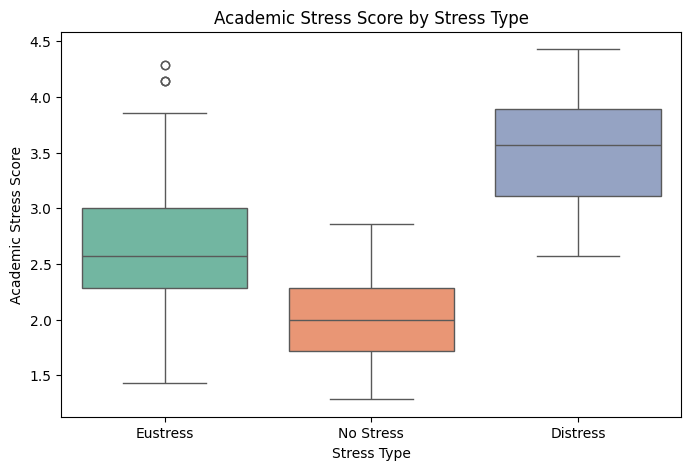

In [13]:
# See if students with higher academic stress scores are more likely to report distress.
plt.figure(figsize=(8,5))
sns.boxplot(x='Stress_Type', y='Academic_Stress_Score', data=stress_df, palette='Set2')
plt.title('Academic Stress Score by Stress Type')
plt.xlabel('Stress Type')
plt.ylabel('Academic Stress Score')
plt.show()

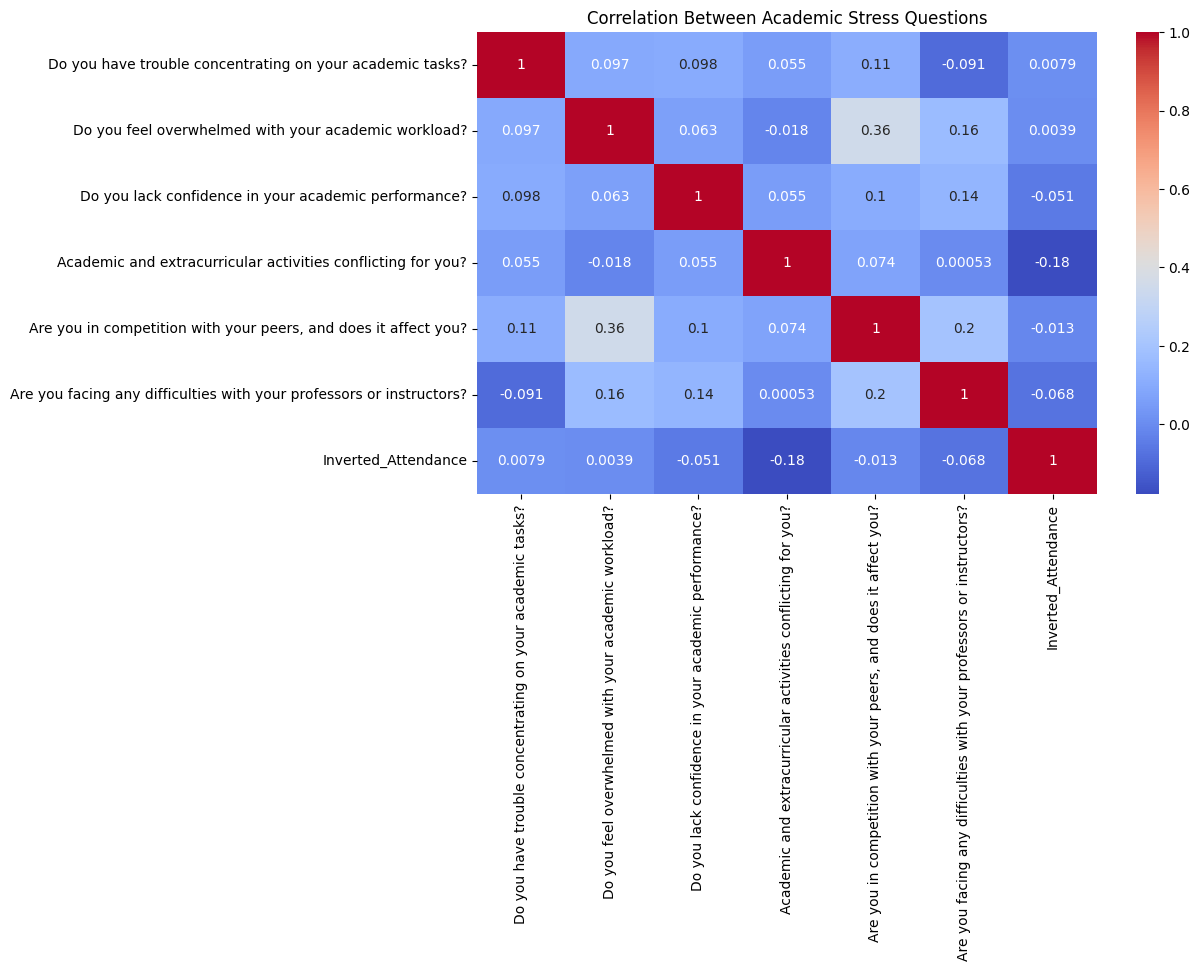

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(stress_df[academic_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Academic Stress Questions')
plt.show()

/var/folders/k_/1nnjx3r16776q9t5yv40m8jh0000gn/T/ipykernel_25736/3337549440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')


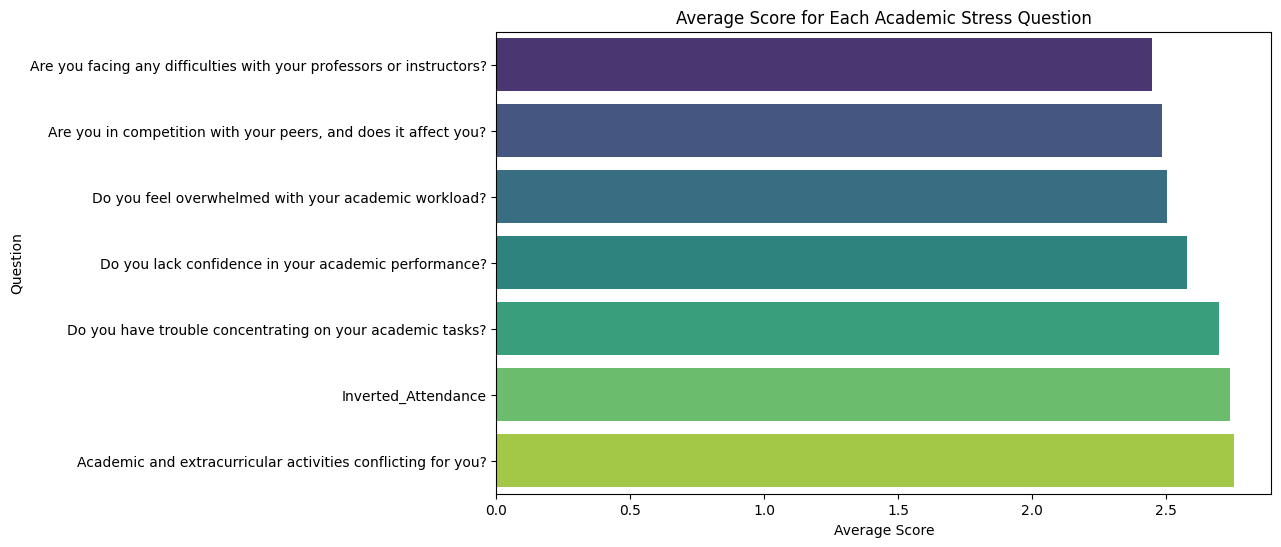

In [12]:
mean_scores = stress_df[academic_columns].mean().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')
plt.title('Average Score for Each Academic Stress Question')
plt.xlabel('Average Score')
plt.ylabel('Question')
plt.show()


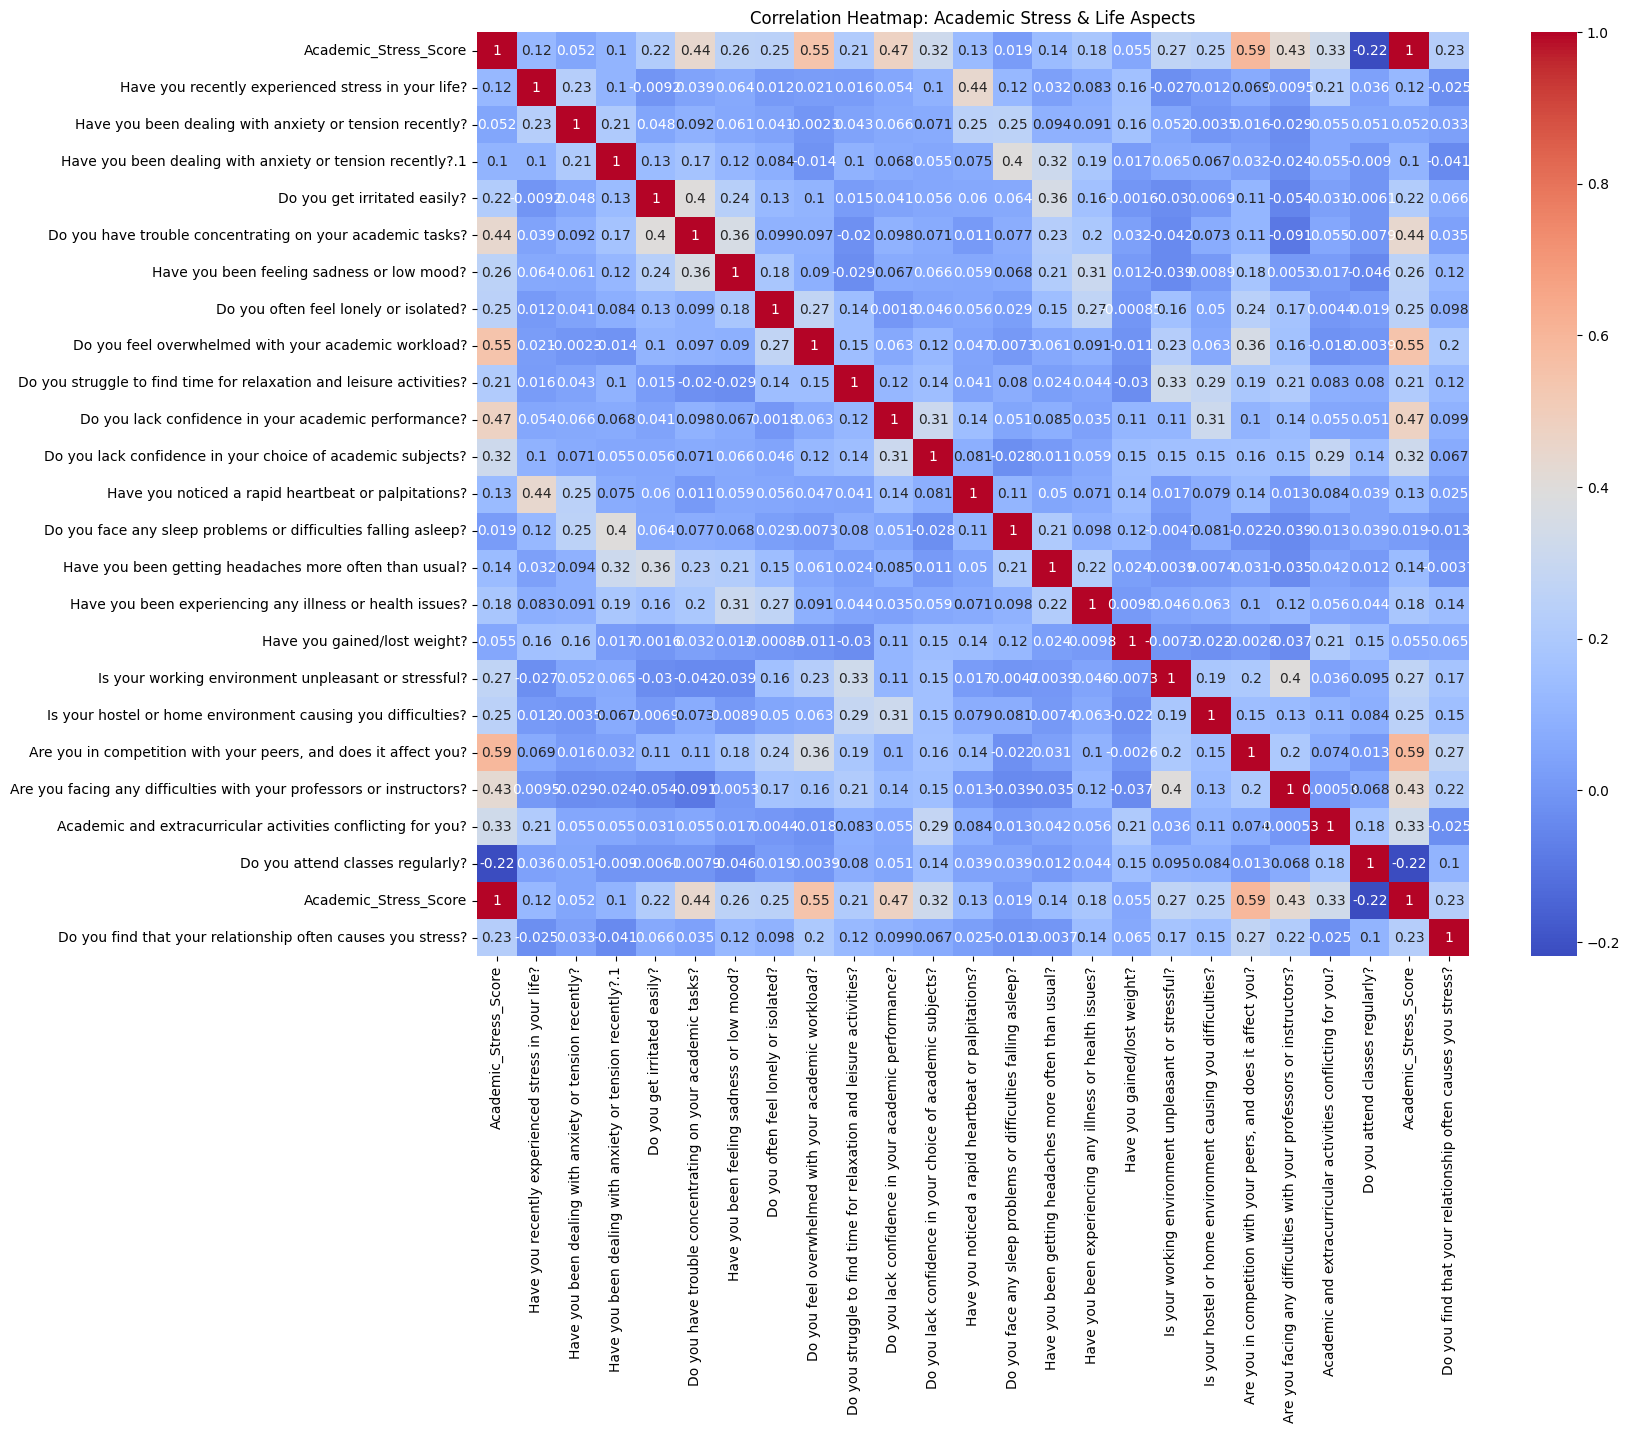

In [14]:

# Psychological Factors
psychological = [
    'Have you recently experienced stress in your life?',
    'Have you been dealing with anxiety or tension recently?',
    'Have you been dealing with anxiety or tension recently?.1',
    'Do you get irritated easily?',
    'Do you have trouble concentrating on your academic tasks?',
    'Have you been feeling sadness or low mood?',
    'Do you often feel lonely or isolated?',
    'Do you feel overwhelmed with your academic workload?',
    'Do you struggle to find time for relaxation and leisure activities?',
    'Do you lack confidence in your academic performance?',
    'Do you lack confidence in your choice of academic subjects?',
    'Which type of stress do you primarily experience?'
]

# Physiological Factors
physiological = [
    'Have you noticed a rapid heartbeat or palpitations?',
    'Do you face any sleep problems or difficulties falling asleep?',
    'Have you been getting headaches more often than usual?',
    'Have you been experiencing any illness or health issues?',
    'Have you gained/lost weight?'
]

# Environmental Factors
environmental = [
    'Is your working environment unpleasant or stressful?',
    'Is your hostel or home environment causing you difficulties?'
]

# Academic Factors
academic = [
    'Are you in competition with your peers, and does it affect you?',
    'Are you facing any difficulties with your professors or instructors?',
    'Academic and extracurricular activities conflicting for you?',
    'Do you attend classes regularly?',
    'Academic_Stress_Score'  # Include your computed score
]

# Social Factors
social = [
    'Do you find that your relationship often causes you stress?'
]

# Combine all columns for correlation
correlation_columns = (
    ['Academic_Stress_Score'] +
    psychological +
    physiological +
    environmental +
    academic +
    social
)

# Filter only columns that exist in the DataFrame
correlation_columns = [col for col in correlation_columns if col in stress_df.columns]

# Only keep numeric columns for correlation
numeric_corr_columns = [col for col in correlation_columns if pd.api.types.is_numeric_dtype(stress_df[col])]

plt.figure(figsize=(16,12))
sns.heatmap(stress_df[numeric_corr_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Academic Stress & Life Aspects')
plt.show()